<a href="https://colab.research.google.com/github/NK-ML/Irish/blob/main/EDA%20on%20stock%20market%20data%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('/content/HistoricalData_1632805545670.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/27/2021,$791.36,28070660,$773.12,$799,$769.31
1,09/24/2021,$774.39,21373020,$745.89,$774.8,$744.56
2,09/23/2021,$753.64,11947530,$755,$758.2,$747.92
3,09/22/2021,$751.94,15126270,$743.5263,$753.6699,$739.12
4,09/21/2021,$739.38,16330720,$734.79,$744.7399,$730.44


In [3]:
df.info

<bound method DataFrame.info of            Date Close/Last    Volume       Open       High      Low
0    09/27/2021    $791.36  28070660    $773.12       $799  $769.31
1    09/24/2021    $774.39  21373020    $745.89     $774.8  $744.56
2    09/23/2021    $753.64  11947530       $755     $758.2  $747.92
3    09/22/2021    $751.94  15126270  $743.5263  $753.6699  $739.12
4    09/21/2021    $739.38  16330720    $734.79  $744.7399  $730.44
..          ...        ...       ...        ...        ...      ...
122  04/05/2021    $691.05  41842770    $707.71    $708.16   $684.7
123  04/01/2021    $661.75  35298380    $688.37  $692.4203  $659.42
124  03/31/2021    $667.93  33337290    $646.62       $672  $641.11
125  03/30/2021    $635.62  39432360    $601.75    $637.66  $591.01
126  03/29/2021    $611.29  28636990    $615.64    $616.48  $596.02

[127 rows x 6 columns]>

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([737881., 737911., 737942., 737972., 738003., 738034., 738064.]),
 <a list of 7 Text major ticklabel objects>)

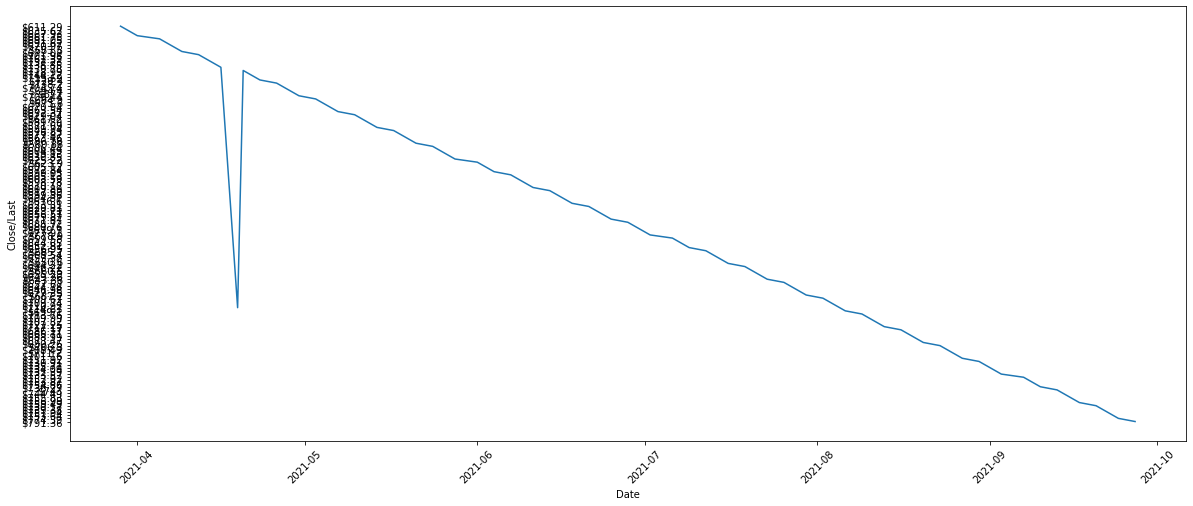

In [8]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close/Last',data=df)
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.xticks(rotation=45)

In [9]:
df['Daily Lag'] = df['Close/Last'].shift(1)
df.head()

,Date,Close/Last,Volume,Open,High,Low,Daily Lag
0,2021-09-27,$791.36,28070660,$773.12,$799,$769.31,NaN
1,2021-09-24,$774.39,21373020,$745.89,$774.8,$744.56,$791.36
2,2021-09-23,$753.64,11947530,$755,$758.2,$747.92,$774.39
3,2021-09-22,$751.94,15126270,$743.5263,$753.6699,$739.12,$753.64
4,2021-09-21,$739.38,16330720,$734.79,$744.7399,$730.44,$751.94


In [61]:
df['Daily Lag']=  pd.to_numeric(df['Daily Lag'], errors='coerce').fillna(0).astype(float)
df['Close/Last']= pd.to_numeric(df['Close/Last'], errors='coerce').fillna(0).astype(float)
df['Daily Returns'] = (df['Daily Lag']/df['Close/Last']) -1
df.head()

,Date,Close/Last,Volume,Open,High,Low,Daily Lag,Daily Returns
0,2021-09-27,791.36,28070660,$773.12,$799,$769.31,0.0,-1.000000
1,2021-09-24,774.39,21373020,$745.89,$774.8,$744.56,791.0,0.021449
2,2021-09-23,753.64,11947530,$755,$758.2,$747.92,774.0,0.027016
3,2021-09-22,751.94,15126270,$743.5263,$753.6699,$739.12,753.0,0.001410
4,2021-09-21,739.38,16330720,$734.79,$744.7399,$730.44,751.0,0.015716


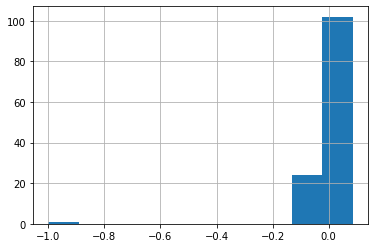

In [62]:
df['Daily Returns'].hist()

In [63]:
mean = df['Daily Returns'].mean()
std = df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -0.0063741426160408236
Std deviation = 0.09230950918251084


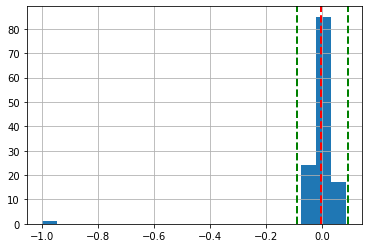

In [64]:
df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [66]:
df['Daily Returns'].kurtosis()

108.69281096951656

In [ ]:
#the value is positive, so this indicates that the chance of ‘extreme’ values are rare. 